In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('missing').getOrCreate()
df = spark.read.csv('diabetedata.csv', header=True, inferSchema=True)


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/10/11 09:46:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 92, 95, 98] [1, 8, 8, 30, 70, 170, 366, 691, 1256, 2028, 2780, 3315, 4392, 4031, 4975, 6326, 4583, 4219, 4344, 3752, 3481, 3159, 2564, 2107, 1794, 1607, 1415, 1189, 970, 701, 686, 665, 456, 373, 359, 272, 236, 195, 195, 122, 111, 109, 57, 79, 50, 37, 44, 25, 29, 20, 18, 20, 9, 11, 9, 8, 7, 4, 5, 9, 9, 12, 1, 9, 2, 18, 1, 17, 1, 9, 11, 1, 13, 1, 1, 13, 4, 9, 4, 4]


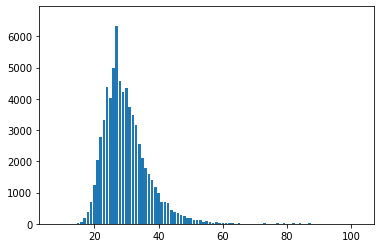

In [31]:
bmilist_name=df.select("BMI").collect()
bmilist = [row[0] for row in bmilist_name]
numcountdict={}
for one in bmilist:
    got=0
    for key1 in numcountdict.keys():
        if one==key1:
            numbefore=numcountdict[one]
            numcountdict[one]=numbefore+1
            got=1
    if got==0:
        numcountdict[one]=1
numsortdict=sorted(numcountdict.items(),key=lambda x:x[0])
namelist=[]
valuelist=[]
for ones in numsortdict:
    namelist.append(ones[0])
    valuelist.append(ones[1])
print(namelist,valuelist)
import matplotlib.pyplot as plt
plt.bar(namelist,valuelist)
plt.margins(0.1)
plt.show()

[0, 1, 3] [35345, 35346, 1]


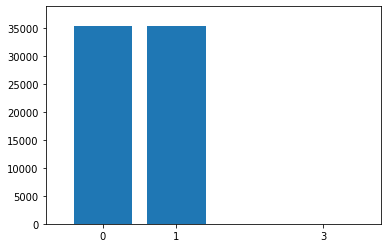

In [34]:
fromsparklist_name=df.select("Diabetes_binary").collect()
fromsparklist = [row[0] for row in fromsparklist_name]
numcountdict={}
for one in fromsparklist:
    got=0
    for key1 in numcountdict.keys():
        if one==key1:
            numbefore=numcountdict[one]
            numcountdict[one]=numbefore+1
            got=1
    if got==0:
        numcountdict[one]=1
numsortdict=sorted(numcountdict.items(),key=lambda x:x[0])
namelist=[]
valuelist=[]
for ones in numsortdict:
    namelist.append(ones[0])
    valuelist.append(ones[1])
print(namelist,valuelist)
import matplotlib.pyplot as plt
plt.bar(namelist,valuelist)
plt.xticks(namelist,namelist)
plt.margins(0.1)
plt.show()

[1, 2, 3, 4, 5, 6] [75, 1647, 3447, 19473, 20030, 26020]


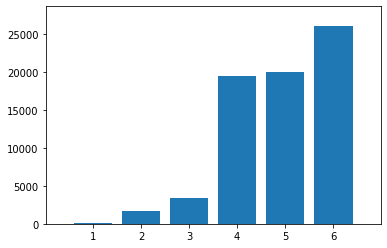

Diabetes_binary
HighBP
HighChol
CholCheck
BMI
Smoker
Stroke
HeartDiseaseorAttack
PhysActivity
Fruits
Veggies
HvyAlcoholConsump
AnyHealthcare
NoDocbcCost
GenHlth
MentHlth
PhysHlth
DiffWalk
Sex
Age
Education
Income
total colnumber= 22


In [3]:
fromsparklist_name=df.select("Education").collect()
fromsparklist = [row[0] for row in fromsparklist_name]
numcountdict={}
for one in fromsparklist:
    got=0
    for key1 in numcountdict.keys():
        if one==key1:
            numbefore=numcountdict[one]
            numcountdict[one]=numbefore+1
            got=1
    if got==0:
        numcountdict[one]=1
numsortdict=sorted(numcountdict.items(),key=lambda x:x[0])
namelist=[]
valuelist=[]
for ones in numsortdict:
    namelist.append(ones[0])
    valuelist.append(ones[1])
print(namelist,valuelist)
import matplotlib.pyplot as plt
plt.bar(namelist,valuelist)
plt.xticks(namelist,namelist)
plt.margins(0.1)
plt.show()
colnumber=0
for onecolumn in df.columns:
    print(onecolumn)
    colnumber+=1
    
print("total colnumber=",colnumber)

+---------------+------+--------+---------+---+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+
|Diabetes_binary|HighBP|HighChol|CholCheck|BMI|Smoker|Stroke|HeartDiseaseorAttack|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex|Age|Education|Income|
+---------------+------+--------+---------+---+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+
+---------------+------+--------+---------+---+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+



In [15]:
df.where("Diabetes_binary is null" or "HighBP is null" or "HighChol is null" or "CholCheck is null" or "BMI is null" or "Smoker is null"\
or "Stroke is null" or "HeartDiseaseorAttack is null" or "PhysActivity is null" or "Fruits is null" or "Veggies is null"\
or "HvyAlcoholConsump is null" or "AnyHealthcare is null" or "NoDocbcCost is null" or "GenHlth is null" or "MentHlth is null"\
or "PhysHlth is null" or "DiffWalk is null" or "Sex is null" or "Age is null" or "Education is null" or "Income is null").show(truncate=False)
print('total-data=',df.count())

+---------------+------+--------+---------+---+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+
|Diabetes_binary|HighBP|HighChol|CholCheck|BMI|Smoker|Stroke|HeartDiseaseorAttack|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex|Age|Education|Income|
+---------------+------+--------+---------+---+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+
+---------------+------+--------+---------+---+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+

total-data= 70692


[0, 1, 2] [27442, 43245, 5]


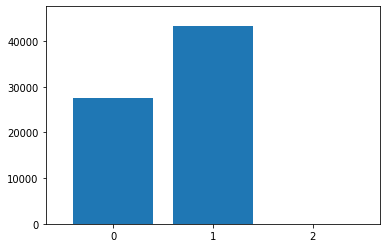

In [16]:
fromsparklist_name=df.select("Fruits").collect()
fromsparklist = [row[0] for row in fromsparklist_name]
numcountdict={}
for one in fromsparklist:
    got=0
    for key1 in numcountdict.keys():
        if one==key1:
            numbefore=numcountdict[one]
            numcountdict[one]=numbefore+1
            got=1
    if got==0:
        numcountdict[one]=1
numsortdict=sorted(numcountdict.items(),key=lambda x:x[0])
namelist=[]
valuelist=[]
for ones in numsortdict:
    namelist.append(ones[0])
    valuelist.append(ones[1])
print(namelist,valuelist)
import matplotlib.pyplot as plt
plt.bar(namelist,valuelist)
plt.xticks(namelist,namelist)
plt.margins(0.1)
plt.show()

['0', '1', 'no'] [14929, 55760, 3]


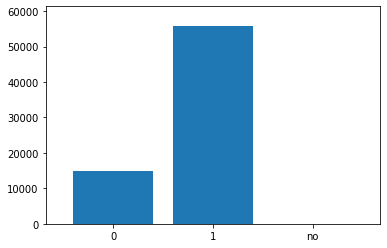

In [17]:
fromsparklist_name=df.select("Veggies").collect()
fromsparklist = [row[0] for row in fromsparklist_name]
numcountdict={}
for one in fromsparklist:
    got=0
    for key1 in numcountdict.keys():
        if one==key1:
            numbefore=numcountdict[one]
            numcountdict[one]=numbefore+1
            got=1
    if got==0:
        numcountdict[one]=1
numsortdict=sorted(numcountdict.items(),key=lambda x:x[0])
namelist=[]
valuelist=[]
for ones in numsortdict:
    namelist.append(ones[0])
    valuelist.append(ones[1])
print(namelist,valuelist)
import matplotlib.pyplot as plt
plt.bar(namelist,valuelist)
plt.xticks(namelist,namelist)
plt.margins(0.1)
plt.show()

[0, 1] [3184, 67508]


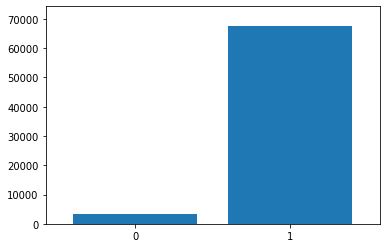

In [2]:
fromsparklist_name=df.select("AnyHealthcare").collect()
fromsparklist = [row[0] for row in fromsparklist_name]
numcountdict={}
for one in fromsparklist:
    got=0
    for key1 in numcountdict.keys():
        if one==key1:
            numbefore=numcountdict[one]
            numcountdict[one]=numbefore+1
            got=1
    if got==0:
        numcountdict[one]=1
numsortdict=sorted(numcountdict.items(),key=lambda x:x[0])
namelist=[]
valuelist=[]
for ones in numsortdict:
    namelist.append(ones[0])
    valuelist.append(ones[1])
print(namelist,valuelist)
import matplotlib.pyplot as plt
plt.bar(namelist,valuelist)
plt.xticks(namelist,namelist)
plt.margins(0.1)
plt.show()

[0, 1] [64053, 6639]


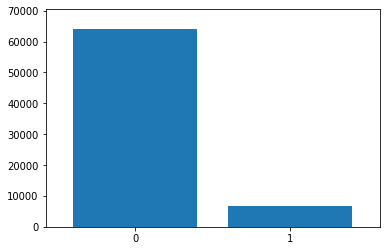

In [3]:
fromsparklist_name=df.select("NoDocbcCost").collect()
fromsparklist = [row[0] for row in fromsparklist_name]
numcountdict={}
for one in fromsparklist:
    got=0
    for key1 in numcountdict.keys():
        if one==key1:
            numbefore=numcountdict[one]
            numcountdict[one]=numbefore+1
            got=1
    if got==0:
        numcountdict[one]=1
numsortdict=sorted(numcountdict.items(),key=lambda x:x[0])
namelist=[]
valuelist=[]
for ones in numsortdict:
    namelist.append(ones[0])
    valuelist.append(ones[1])
print(namelist,valuelist)
import matplotlib.pyplot as plt
plt.bar(namelist,valuelist)
plt.xticks(namelist,namelist)
plt.margins(0.1)
plt.show()